Adınız: Cahit

Soyadınız: Doğan

Okul Numaranız: 2112721009

GitHub Repo Bağlantısı: https://github.com/cahitdogan/Genetic-Algorithm

In [7]:
# Kütüphaneler
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
# Sınıf ve Değişken Tanımları

class Birey:
    def __init__(self, x1, x2):
        self.genler = [x1, x2]
        self.fitness = 0

    def __repr__(self):
        return f"Genler: [{self.genler[0]:.2f}, {self.genler[1]:.2f}] | Fitness: {self.fitness:.4f}"

# Problem Sabitleri
MUTASYON_BUYUKLUGU = 0.2
POPULASYON_BOYUTU = 4
NESIL_SAYISI = 100 #

# Kısıtlar ve Aralıklar
X1_MIN, X1_MAX = 0, 10
X2_MIN, X2_MAX = 0, 10
KISIT_TOPLAM = 12
KISIT_X2_ALT = 2

In [9]:
# Yardımcı Fonksiyonlar

def fitness_hesapla(birey):
    """
    Amaç fonksiyonu: y = 4x1 + 5x2 - 0.5x1^2 - 0.2x2^2
    Kısıtlar sağlanmazsa ceza puanı uygulanır (fitness = 0 veya çok düşük yapılır).
    """
    x1, x2 = birey.genler

    # Kısıt Kontrolü
    # 1. x1 + x2 <= 12
    # 2. x2 >= 2
    # Aralık kontrolleri zaten üretimde yapılır ama yine de ceza eklenebilir.

    kural_ihlali = False
    if (x1 + x2) > KISIT_TOPLAM:
        kural_ihlali = True
    if x2 < KISIT_X2_ALT:
        kural_ihlali = True
    # Değişken sınırları
    if not (X1_MIN <= x1 <= X1_MAX) or not (X2_MIN <= x2 <= X2_MAX):
        kural_ihlali = True

    # Amaç fonksiyonu
    y = 4*x1 + 5*x2 - 0.5*(x1**2) - 0.2*(x2**2)

    if kural_ihlali:
        return max(y - 3, 1e-6) # Kural ihlali durumunda birey 3 ceza puanı alır.
    else:
        return max(y, 1e-6)

    # Fitness negatif olmamalı (Roulette Wheel için), eğer negatifse 1e-6 dönebiliriz.


def birey_olustur():
    """Rastgele genlere sahip bir birey oluşturur."""
    x1 = random.uniform(X1_MIN, X1_MAX)
    x2 = random.uniform(X2_MIN, X2_MAX)
    return Birey(x1, x2)

def populasyon_olustur(boyut=POPULASYON_BOYUTU):
    """Belirtilen boyutta rastgele popülasyon oluşturur."""
    return [birey_olustur() for _ in range(boyut)]

def rulet_tekerlegi_secimi(populasyon):
    """
    Fitness değerlerine göre normalize edilmiş olasılıklarla seçim yapar.
    Popülasyon boyutu kadar birey seçer.
    """
    # Fitness değerlerini topla
    toplam_fitness = sum(b.fitness for b in populasyon)

    if toplam_fitness == 0:
        # Herkes 0 ise rastgele seç
        return random.choices(populasyon, k=len(populasyon))

    # Olasılıkları hesapla (Normalize et)
    olasiliklar = [b.fitness / toplam_fitness for b in populasyon]

    # Seçim yap
    secilenler = random.choices(populasyon, weights=olasiliklar, k=len(populasyon))
    yeni_secilenler = []
    for b in secilenler:
        yeni_secilenler.append(Birey(b.genler[0], b.genler[1]))

    return yeni_secilenler

def caprazlama(parent1, parent2):
    """
    Birinci bireyin ilk geni ve ikinci bireyin ikinci geni alınarak yeni birey oluşturulur.
    """
    yeni_gen1 = parent1.genler[0]
    yeni_gen2 = parent2.genler[1]
    return Birey(yeni_gen1, yeni_gen2)

def mutasyon(birey):
    """
    Aritmetik mutasyon uygular.
    Yeni Değer = Mevcut Değer + Mutasyon Büyüklüğü * (Rastgele Sayı - 0.5)
    Rastgele Sayı: [-0.5, 0.5] aralığındaki bir sayı
    """
    yeni_genler = []
    for gen in birey.genler:
        rastgele_sayi = random.random() - 0.5
        delta = MUTASYON_BUYUKLUGU * rastgele_sayi
        yeni_deger = gen + delta
        yeni_genler.append(yeni_deger)

    # Mutasyon sonrası bireyin genlerini güncelle
    birey.genler = yeni_genler

    return birey

def turnuva_secimi(havuz, k=2):
    """Havuzdan rastgele k birey seçip en iyisini döndürür."""
    adaylar = random.sample(havuz, k)
    adaylar.sort(key=lambda x: x.fitness, reverse=True)
    return adaylar[0]

Başlangıç Popülasyonu En İyi Fitness: 30.2506
Nesil 1 En İyi Fitness: 30.9567 | Genler: [0.9541019520018358, 8.225328324303318]
Nesil 2 En İyi Fitness: 31.1321 | Genler: [0.9943028915575689, 8.256863369479882]
Nesil 3 En İyi Fitness: 31.3140 | Genler: [1.0067681561965136, 8.342885753823905]
Nesil 4 En İyi Fitness: 31.5092 | Genler: [1.082825864792955, 8.325157586919346]
Nesil 5 En İyi Fitness: 31.8064 | Genler: [1.166123843782957, 8.35982140870618]
Nesil 6 En İyi Fitness: 31.9041 | Genler: [1.1729452660826398, 8.407466294854022]
Nesil 7 En İyi Fitness: 32.1998 | Genler: [1.2407363441319812, 8.47291670113528]
Nesil 8 En İyi Fitness: 32.5003 | Genler: [1.3368489111473878, 8.497818694413063]
Nesil 9 En İyi Fitness: 32.5003 | Genler: [1.3368489111473878, 8.497818694413063]
Nesil 10 En İyi Fitness: 32.6978 | Genler: [1.389427418164034, 8.534717419935774]
Nesil 11 En İyi Fitness: 33.0282 | Genler: [1.4659807231320225, 8.61979424425395]
Nesil 12 En İyi Fitness: 33.3215 | Genler: [1.5557136948

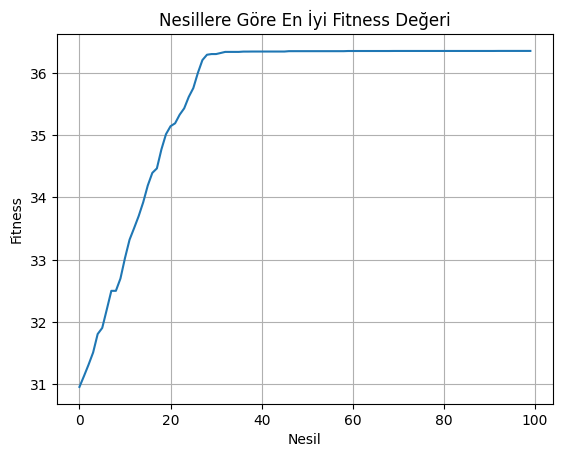

In [10]:
def genetik_algoritma_calistir():
    en_iyi_fitness_gecmisi = []

    # Başlangıç popülasyonu oluşturulması
    populasyon = populasyon_olustur()

    # İlk fitness hesaplaması
    for b in populasyon:
        b.fitness = fitness_hesapla(b)

    print(f"Başlangıç Popülasyonu En İyi Fitness: {max(b.fitness for b in populasyon):.4f}")

    for nesil in range(1, NESIL_SAYISI + 1):
        # Seçilim (Rulet Tekerleği)
        secilenler = rulet_tekerlegi_secimi(populasyon)

        # Çaprazlama (Her ikili kombinasyon için)
        cocuklar = []
        for i in range(len(secilenler)):
            for j in range(i + 1, len(secilenler)):
                p1 = secilenler[i]
                p2 = secilenler[j]
                cocuk = caprazlama(p1, p2)
                cocuklar.append(cocuk)

        # Mutasyon
        mutant_bireyler = []
        for cocuk in cocuklar:
            mutant_kopyasi = Birey(cocuk.genler[0], cocuk.genler[1])
            mutant_bireyler.append(mutasyon(mutant_kopyasi))

        # Havuz Oluşturma ve Fitness Hesaplama
        # Havuz = Seçilmiş Bireyler (önceki) + Mutant Bireyler

        havuz = secilenler + mutant_bireyler

        for b in havuz:
            b.fitness = fitness_hesapla(b)

        # Yeni Nesil Seçimi
        yeni_populasyon = []

        # Havuzdaki en iyi bireyi al (Elitizm)
        havuz.sort(key=lambda x: x.fitness, reverse=True)
        en_iyi_birey = havuz[0]
        yeni_populasyon.append(en_iyi_birey) # 1. birey

        # Geri kalan (POPULASYON_BOYUTU - 1) kontenjan için Turnuva Seçimi
        while len(yeni_populasyon) < POPULASYON_BOYUTU:
            kazanan = turnuva_secimi(havuz)
            yeni_populasyon.append(Birey(kazanan.genler[0], kazanan.genler[1]))

        populasyon = yeni_populasyon

        # En iyiyi kaydet
        en_iyi_fitness_gecmisi.append(en_iyi_birey.fitness)
        print(f"Nesil {nesil} En İyi Fitness: {en_iyi_birey.fitness:.4f} | Genler: {en_iyi_birey.genler}")

    # --- Raporlama ---
    en_iyi_son = max(populasyon, key=lambda x: x.fitness)
    print("\n--- Sonuç ---")
    print(f"En İyi Birey: {en_iyi_son}")

    # Grafiği çiz
    plt.plot(en_iyi_fitness_gecmisi)
    plt.title("Nesillere Göre En İyi Fitness Değeri")
    plt.xlabel("Nesil")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    genetik_algoritma_calistir()